# **BUILDING A SIMPLE KNN MODEL**

In this project, i have built a k-nearest-neighbor algorithm and tried to find the the optimal value of k for different datasets. I have also used the built in model in sklearn and tried to compare my results with it.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

I am using the popular [Iris](https://www.kaggle.com/datasets/saurabh00007/iriscsv) Dataset for this

In [2]:
df = pd.read_csv('Iris.csv')
df['Species'].unique()
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Making a 3D graph to visualize the Data

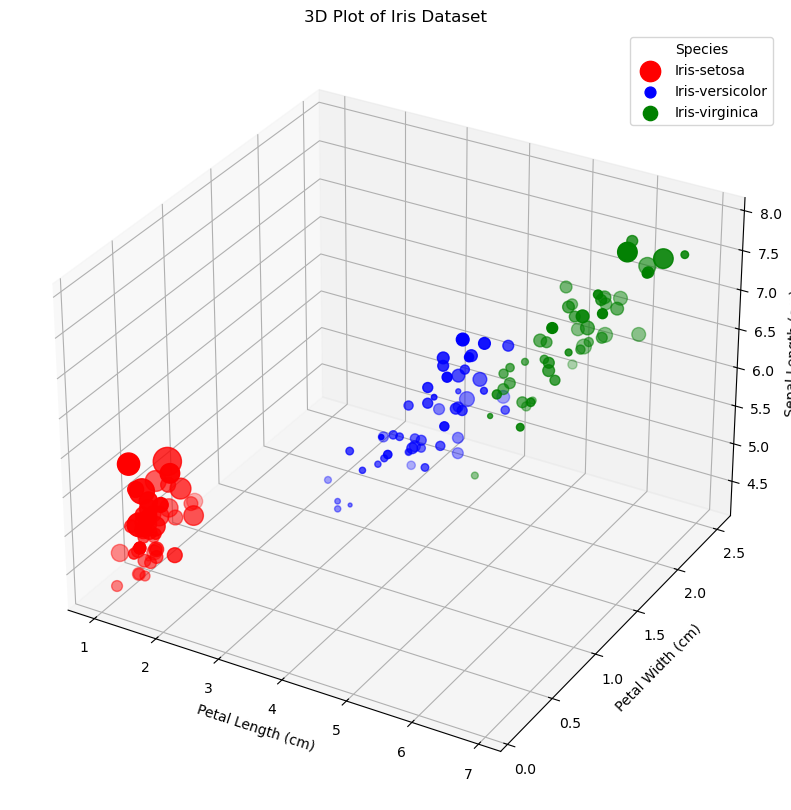

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import seaborn as sns



species_colors = {'Iris-setosa': 'red', 'Iris-versicolor': 'blue', 'Iris-virginica': 'green'}
marker = '.'

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')


for species, color in species_colors.items():
    subset = df[df['Species'] == species]
    ax.scatter(
        subset['PetalLengthCm'],  # X-axis
        subset['PetalWidthCm'],   # Y-axis
        subset['SepalLengthCm'],  # Z-axis
        s=subset['SepalWidthCm']**5,  # Size scaled by Sepal Width
        color=color,
        label=species,
        marker=marker
    )


ax.set_xlabel('Petal Length (cm)')
ax.set_ylabel('Petal Width (cm)')
ax.set_zlabel('Sepal Length (cm)')
ax.set_title('3D Plot of Iris Dataset')


ax.legend(title="Species")

plt.show()


Spliting the dataset into traing and testing sets in the ratio 4:1

In [4]:
Xf = df.drop(['Species','Id'], axis=1)
yf = df['Species']
from sklearn.model_selection import train_test_split
Xf_train,Xf_test,yf_train,yf_test = train_test_split(Xf,yf,test_size=0.2,random_state=13)

Xf_train_array = Xf_train.to_numpy()
Xf_test_array = Xf_test.to_numpy()


yf_train_array = yf_train.to_numpy()
yf_test_array = yf_test.to_numpy()


print(f"X_train_array shape: {Xf_train_array.shape}")
print(f"X_test_array shape: {Xf_test_array.shape}")
print(f"y_train_array shape: {yf_train_array.shape}")
print(f"y_test_array shape: {yf_test_array.shape}")


print(Xf_train_array[:5])
print(yf_train_array[:5])

X_train_array shape: (120, 4)
X_test_array shape: (30, 4)
y_train_array shape: (120,)
y_test_array shape: (30,)
[[6.4 3.1 5.5 1.8]
 [5.2 4.1 1.5 0.1]
 [5.4 3.4 1.5 0.4]
 [6.9 3.1 5.1 2.3]
 [6.3 2.5 5.  1.9]]
['Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica']


# **MY MODEL**

This is a class (knn) which i have made from scratch. It calculates Euclidian distance between the testing point and all other training points and then classifies the given testing point by majority using the knn.predict method. You can train the class using the knn.fit method. Accuracy of testing sets can be calculated using the knn.score method.

In [5]:
class knn():

  def __init__(self, k =3):
    self.k = k

  def fit(self, X_train, y_train):
    self.X_train = X_train
    self.y_train = y_train

  def predict(self, X_test):
    distances = []
    for point in self.X_train:
      distance = np.sqrt(np.sum((point - X_test)**2))
      distances.append(distance)
    kNearestNeighbours = np.argsort(distances)[:self.k]
    labels = self.y_train[kNearestNeighbours]
    labels_series = pd.Series(labels)
    predicted_label = labels_series.value_counts().idxmax()
    return predicted_label

  def score(self, X_test, y_test):
    y_predict_array = []
    for i in X_test:
      y_predict = self.predict(i)
      y_predict_array.append(y_predict)
    total = len(y_test)
    correct = 0
    for i in range(0,total):
      if y_predict_array[i] == y_test[i]:
        correct += 1
    accuracy = correct/total
    return accuracy*100

Here i have calculated the accuracy of the model over the X_test set for k ranging from 1 to 120.

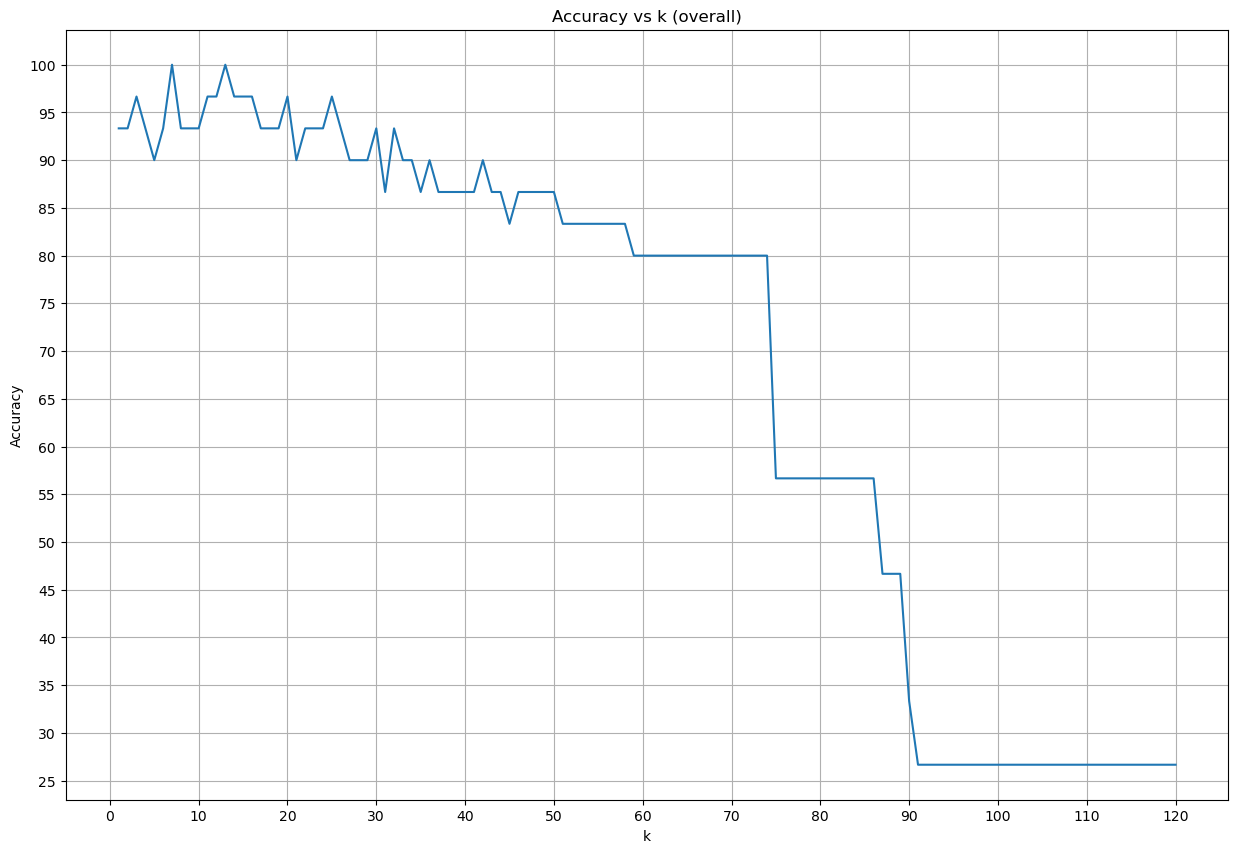

In [6]:
accuracy_arrayf = []
for i in range(1,121):
  knn_model = knn(k=i)
  knn_model.fit(Xf_train_array,yf_train_array)
  accuracy = knn_model.score(Xf_test_array,yf_test_array)
  accuracy_arrayf.append(accuracy)

plt.figure(figsize = (15,10))
plt.plot(range(1,121),accuracy_arrayf,)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k (overall)')
plt.grid()
plt.xticks(range(0,121,10))
plt.yticks(range(25,101,5))
plt.show()

From the graph we can see that the accuracy fluctuates a lot with k. The accuracy drops significantly for higher k. This is because when k is high, the model tends to generelize the dataset which leads to reduced accuracy. The optimal value of k varies from dataset to dataset. For this case the accuracy is maximum for k = 7 and k = 13.


---



# **SKLEARN MODEL**

Here, i've tried to do the same thing, but this time i'm using the inbuilt KNeighborsClassifier class from sklearn.neighbors .

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

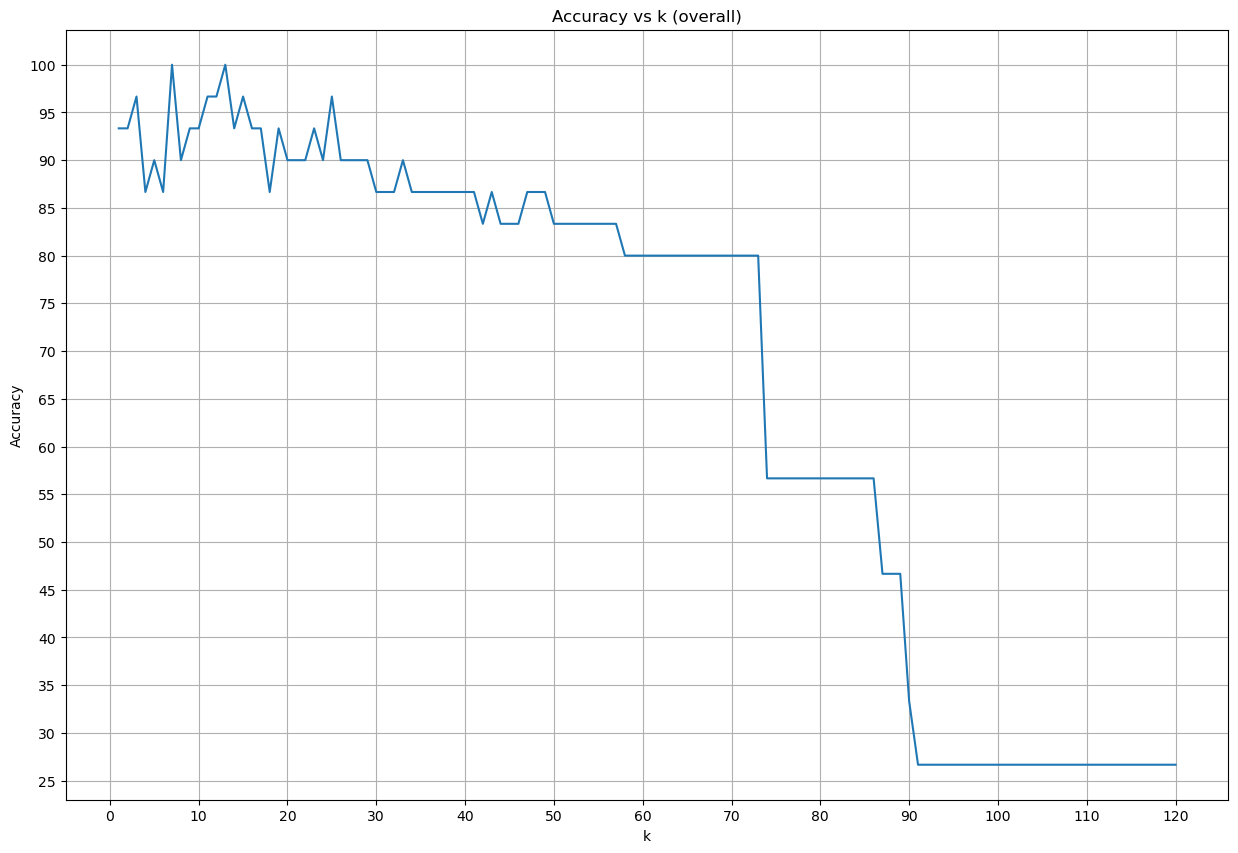

In [8]:
accuracy_arrayf2 = []
for i in range(1,121):
  knn_model = KNeighborsClassifier(n_neighbors = i)
  knn_model.fit(Xf_train_array,yf_train_array)
  y_predict = knn_model.predict(Xf_test_array)
  acc = accuracy_score(yf_test, y_predict)*100
  accuracy_arrayf2.append(acc)

plt.figure(figsize = (15,10))
plt.plot(range(1,121),accuracy_arrayf2)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k (overall)')
plt.grid()
plt.xticks(range(0,121,10))
plt.yticks(range(25,101,5))
plt.show()

A similar graph is observed while using the sklearn model. We can see that the accuracy is maximum(100%) when k = 13. So we can say that 13 is an optimal value of k for this dataset.


---



Let us try using the knn model on another dataset. I am using the [Breast Cancer Wisconsin Dataset](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data) from Kaggle. While the previous dataset only had 4 features, This one has 30 features.

In [9]:
breast_cancer = pd.read_csv('breast_cancer.csv')
breast_cancer.drop(['Unnamed: 32'],axis=1,inplace=True)


print(breast_cancer.info())

print(breast_cancer['diagnosis'].unique())
print(breast_cancer.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

We will classify the cases on the basis of Diagnosis which can be 'M'(cancerous) or 'B'(non-cancerous).

In [10]:
Xb = breast_cancer.drop(['diagnosis','id'], axis=1)
yb = breast_cancer['diagnosis']
from sklearn.model_selection import train_test_split
Xb_train,Xb_test,yb_train,yb_test = train_test_split(Xb,yb,test_size=60/500,random_state=13)

Xb_train_array = Xb_train.to_numpy()
Xb_test_array = Xb_test.to_numpy()


yb_train_array = yb_train.to_numpy()
yb_test_array = yb_test.to_numpy()


print(f"X_train_array shape: {Xb_train_array.shape}")
print(f"X_test_array shape: {Xb_test_array.shape}")
print(f"y_train_array shape: {yb_train_array.shape}")
print(f"y_test_array shape: {yb_test_array.shape}")




from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(Xb_train_array)
X_test_scaled = scaler.transform(Xb_test_array)



from sklearn.decomposition import PCA
pca = PCA(n_components=10)  # Reduce to 10 components
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(X_train_pca[:5])
print(yb_train_array[:5])

X_train_array shape: (500, 30)
X_test_array shape: (69, 30)
y_train_array shape: (500,)
y_test_array shape: (69,)
[[ 1.27588065e-01  8.68200627e-02  1.37669235e-01 -5.01329948e-02
   3.09268647e-03 -9.87586318e-02  8.10702485e-02 -6.24818019e-02
   4.70438842e-04 -2.12554356e-02]
 [ 1.82422130e+00 -3.93128315e-01 -3.91909250e-01 -5.24498625e-03
   7.27991328e-02  3.42757556e-02 -1.07012857e-01 -2.70023187e-02
  -2.06710341e-01  9.63412843e-03]
 [-1.50044543e-01 -2.38159322e-01 -2.48637425e-01 -1.69095776e-01
  -2.41824016e-01  5.99491526e-02 -2.00806312e-02 -2.16324600e-02
   2.19092102e-02  4.38158731e-03]
 [-2.37850636e-01  3.80562819e-01  7.09522317e-02  1.74879146e-01
  -9.06565896e-02 -1.14325453e-01  2.02301791e-02  1.73253408e-02
  -1.57459568e-02 -3.57955972e-02]
 [-3.62195499e-02  4.67275299e-02  5.61015100e-02  3.08936238e-01
  -2.35232121e-01  1.31554474e-01 -1.10151929e-01 -3.11457602e-02
  -1.13372419e-01 -5.00282191e-02]]
['M' 'M' 'B' 'B' 'B']


I have scaled all the values in the range [0,1] to reduce biasness towards any one feature. I have also used PCA to reduce the curse of dimensionality. This is beacuse as the number of dimensions increases, the effectiveness of Euclidean distance decreases.

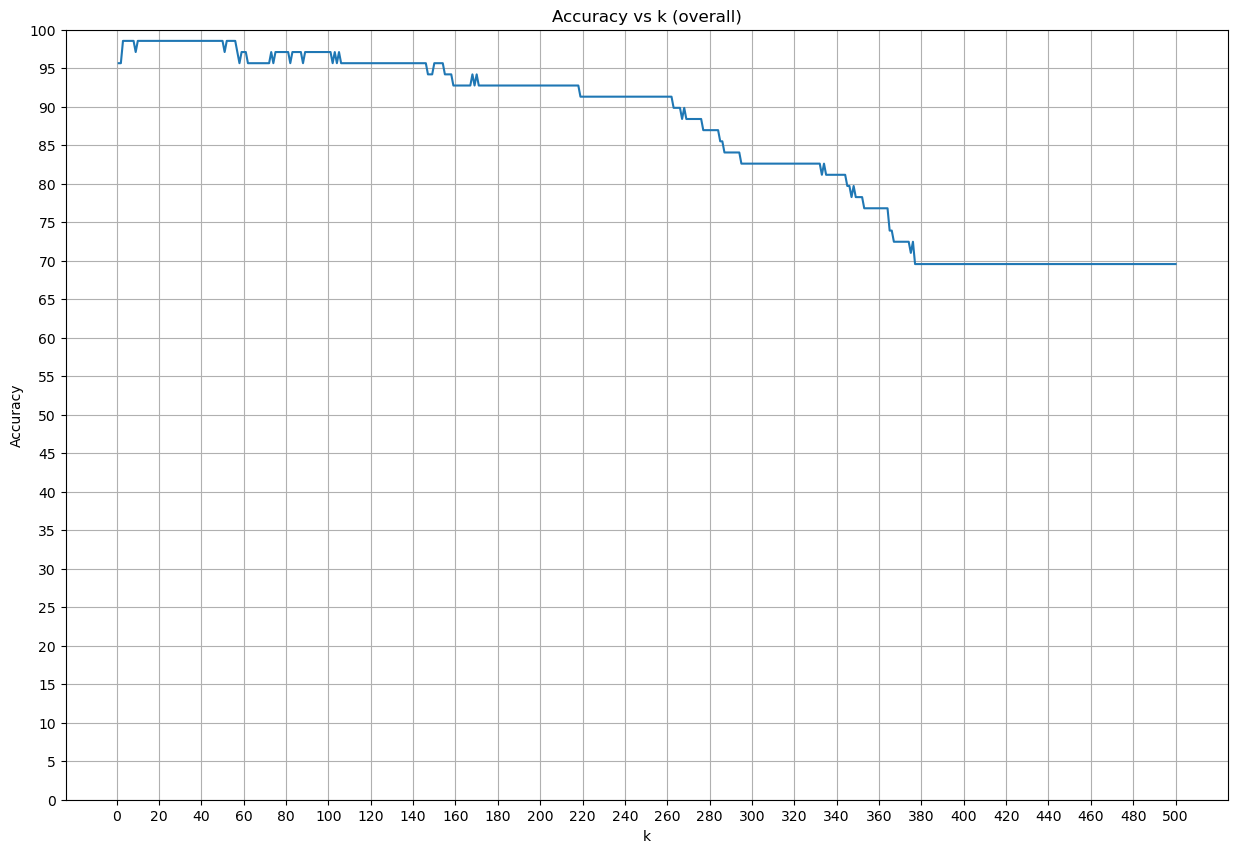

In [11]:
accuracy_arrayb = []
for i in range(1,501):
  knn_model = knn(k=i)
  knn_model.fit(X_train_pca,yb_train_array)
  accuracy = knn_model.score(X_test_pca,yb_test_array)
  accuracy_arrayb.append(accuracy)



plt.figure(figsize = (15,10))
plt.plot(range(1,501),accuracy_arrayb,)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k (overall)')
plt.grid()
plt.xticks(range(0,501,20))
plt.yticks(range(0,101,5))
plt.show()

From the above graph we can say that the accuracy is pretty high for lower values of k but starts to drop for higher values. Eventually the accuracy converges to 69.56% for k greater than 377. The maximum accuracy is 98.55% achieved by k >= 3 and k <= 56.


---



Now let us use the sklearn model.

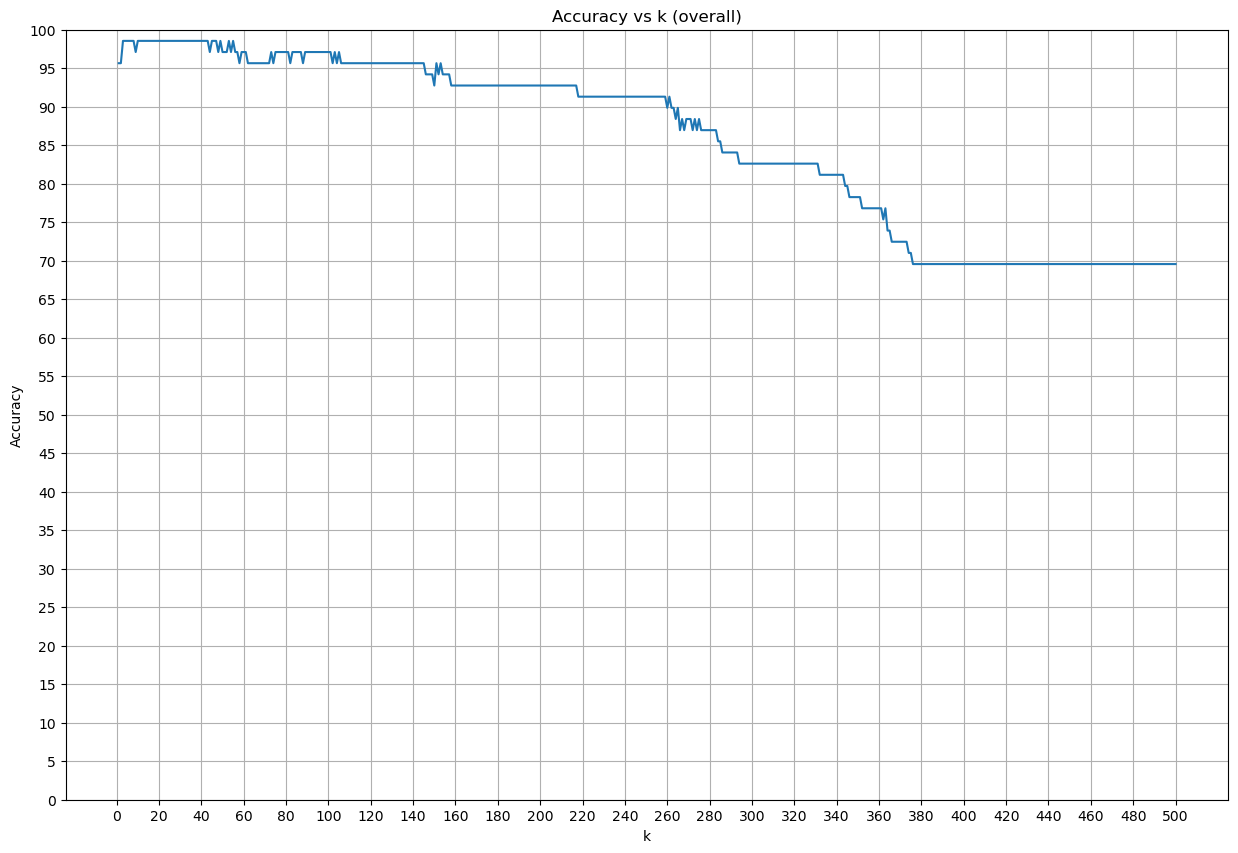

In [12]:
accuracy_arrayfb = []
for i in range(1,501):
  knn_model = KNeighborsClassifier(n_neighbors = i)
  knn_model.fit(X_train_pca,yb_train_array)
  y_predict = knn_model.predict(X_test_pca)
  acc = accuracy_score(yb_test, y_predict)*100
  accuracy_arrayfb.append(acc)

plt.figure(figsize = (15,10))
plt.plot(range(1,501),accuracy_arrayfb)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k (overall)')
plt.grid()
plt.xticks(range(0,501,20))
plt.yticks(range(0,101,5))
plt.show()

Once again we can see that tha accuracy scores are more or less the same as with my model. The optimal value of k in this dataset is between 3 and 56


---

